In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Dataset analysis**



Reading the CSV file into pandas dataframe

In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Opinion mining/labeled_data.csv',encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Dataset info

In [0]:
print("length of data",len(df))
print("dataset shape", df.shape)

print("dataset columns:",df.columns)
print("dataset columns length:",len(df.columns))

print("dataset rows:",df.index)
print("dataset rows length:",len(df.index))

length of data 24783
dataset shape (24783, 7)
dataset columns: Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
dataset columns length: 7
dataset rows: RangeIndex(start=0, stop=24783, step=1)
dataset rows length: 24783


In [0]:
#dropping the nan values from our dataframe if any present but no such empty cells exist in our dataframe so its shape remains same
df = df.dropna()
print(df.shape)


# if any empty row exist then droping the rows also drops it's index values so we need to adjust the indexing values.
copy_df = df.copy()
copy_df.reset_index(inplace = True)
copy_df
# here we are creating a copy of dataframe and resetting its index if NaN val. exists without effecting our original dataframe

(24783, 7)


,index,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...,...
24778,24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


creating our feature matrix by removing both Unnamed and class columns and also tweet col. since here we would add numeric values using BOW in tweet col.

In [0]:

x = df.drop(['Unnamed: 0','class','tweet'], axis = 1)
x.head()



,count,hate_speech,offensive_language,neither
0,3,0,0,3
1,3,0,3,0
2,3,0,3,0
3,3,0,2,1
4,6,0,6,0


In [0]:
print("length of feature dataset",len(x))
print("feature dataset shape", x.shape)

print("dataset columns:",x.columns)
print("dataset columns length:",len(x.columns))

print("dataset rows:",x.index)
print("dataset rows length:",len(x.index))

length of feature dataset 24783
feature dataset shape (24783, 4)
dataset columns: Index(['count', 'hate_speech', 'offensive_language', 'neither'], dtype='object')
dataset columns length: 4
dataset rows: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            24773, 24774, 24775, 24776, 24777, 24778, 24779, 24780, 24781,
            24782],
           dtype='int64', length=24783)
dataset rows length: 24783


creating our response matrix by including class

In [0]:
y = df['class']
print(y)

print("length of response series:",len(y))


0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64
length of response series: 24783


**Text preprocessing by removing stopwords and using stemming/lemmatization**

In [0]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

cleaned_tweets = []

In [0]:
for i in range(0,len(df)):
    
    # we are selecting the tweets in the dataframe and applying various operations in it
    review = re.sub('[^a-zA-Z]'," ", df['tweet'][i])

    # lower casing all tweet data
    review = review.lower()
    
    # we are splitting the messages into word list on the basis of spaces
    review = review.split()
    
    # if word is not stopword then we stem it and excludes all the stopwords 
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english') ]
    
    review = " ".join(review)
    
    cleaned_tweets.append(review)

In [0]:
# after removing stopwords and applying stemming 
cleaned_tweets

['rt mayasolovely woman complain cleaning house amp man always take trash',
 'rt mleew boy dat cold tyga dwn bad cuffin dat hoe st place',
 'rt urkindofbrand dawg rt sbaby life ever fuck bitch start cry confused shit',
 'rt c g anderson viva based look like tranny',
 'rt shenikaroberts shit hear might true might faker bitch told ya',
 'madison x shit blow claim faithful somebody still fucking hoe',
 'brighterdays sit hate another bitch got much shit going',
 'selfiequeenbri cause tired big bitch coming u skinny girl',
 'amp might get ya bitch back amp thats',
 'rhythmixx hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle amp bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoe wont change',
 'fuck bitc

In [0]:
len(cleaned_tweets)

24783

**Final Preparation of Feature and Response matrix**

In the tweet column we are applying TF-IDF to convert text data into numeric features

In [0]:

#applying the TfidfVectorizer for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# taking the most frequent 25000 words and take combination of unigrams as a feature and then apply BOW
tf = TfidfVectorizer(max_features = 10000,ngram_range=(1,1))

x_part = tf.fit_transform(cleaned_tweets).toarray()

In [0]:
print(x_part)

print(x_part.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(24783, 10000)


In [0]:
# getting the unique words in colomns of x_part
tf.get_feature_names()[:20]

['aa',
 'aaa',
 'aaliyah',
 'aap',
 'aaron',
 'aaronworthing',
 'aaryneliza',
 'ab',
 'abbey',
 'abby',
 'abc',
 'abcbirds',
 'abdullah',
 'abed',
 'abel',
 'ability',
 'able',
 'abo',
 'abortion',
 'abou']

In [0]:
# getting all info. regarding BOW array
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

We would add this x_part to our feature matrix

In [0]:
import numpy as np

In [0]:
# we are converting feature matrix dataframe to a numpy array as x_array
x_array = x.to_numpy()

In [0]:
# horizontally stacking the feature matrix with the BOW array to complete our whole feature matrix
X = np.hstack((x_array,x_part))

In [0]:
# All info of feature matrix 
print("length of feature matrix",len(X))
print("feature matrix shape", X.shape)

print("feature matrix size:",X.size)
print("feature matrix dimension:",X.ndim)

print("feature matrixt datatype:",X.dtype)
print("feature matrix item size of each elem:",X.itemsize)

length of feature matrix 24783
feature matrix shape (24783, 10004)
feature matrix size: 247929132
feature matrix dimension: 2
feature matrixt datatype: float64
feature matrix item size of each elem: 8


In [0]:
"""
X_feature_part = pd.DataFrame(x_part, columns = tf.get_feature_names())

X_feature_part.head()
X_feature_part.shape

output -> (24783, 10000)
"""

'\nX_feature_part = pd.DataFrame(x_part, columns = tf.get_feature_names())\n\nX_feature_part.head()\nX_feature_part.shape\n\noutput -> (24783, 10000)\n'

In [0]:
"""
Visualization of Feature matrix in dataframe form

x - dataframe with col: ['count', 'hate_speech', 'offensive_language', 'neither']
    shape : (24783,4)


converting our BOW array into pandas dataframe
X_feature_part = pd.DataFrame(x_part, columns = cv.get_feature_names())
    X_feature_part :[word1,word2,......]
    shape:(24783,5000)


X_feature = pd.concat([x,X_feature_part], axis=1)
    shape:(24783,5004)  

"""

In [0]:
# we are converting response matrix series to a numpy array as Y
Y = y.to_numpy()

In [0]:
"""
Visualization of Response matrix

y - dataframe with col: class
    shape:(24783,1)

"""    

**Splitting the dataset for training and testing**

In [0]:
#divide the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30 , random_state=0)

Info of all train and test dataset

In [0]:
# x_train
print("length of feature train dataset",len(x_train))
print("feature train dataset shape", x_train.shape)

# x_test
print("length of feature test dataset",len(x_test))
print("feature test dataset shape", x_test.shape)

# y_train
print("length of response train dataset",len(y_train))
print("response train dataset shape", y_train.shape)

# y_test
print("length of response test dataset",len(y_test))
print("feature response test shape", y_test.shape)


length of feature train dataset 17348
feature train dataset shape (17348, 10004)
length of feature test dataset 7435
feature test dataset shape (7435, 10004)
length of response train dataset 17348
response train dataset shape (17348,)
length of response test dataset 7435
feature response test shape (7435,)


**Training the machine learning Model**

 1) Using Randon Forest classifier with single parameter 

In [0]:
import itertools

# creating a training object
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [0]:
# fitting the naive bayes algorithm model
classifier.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Analysis of the trained Model**

In [0]:
y_pred = classifier.predict(x_test)

a) printing the accuracy score

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy :',accuracy*100,"%")

accuracy : 99.87895090786819 %


b) printing the confusion matrix

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# using the traditional way to print the confusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[ 418,    9,    0],
       [   0, 5747,    0],
       [   0,    0, 1261]])

Text(0.5, 1.0, 'Accuracy score:99.87895090786819 %')

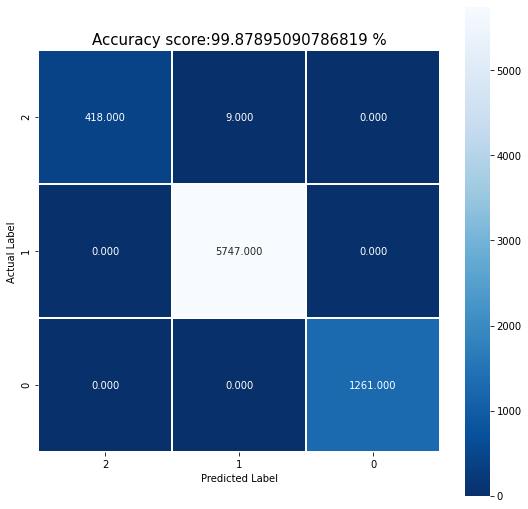

In [0]:
# using seaborn to print the confusion matrix

mat = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(mat, annot=True, fmt='.3f', linewidths = 0.5 , square = True , cmap = 'Blues_r', xticklabels = y.unique(), yticklabels = y.unique())
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

sample_tit = 'Accuracy score:{} %'.format(accuracy*100)
plt.title(sample_tit,size = 15)

c) printing classification report

In [0]:
from sklearn.metrics import classification_report

In [0]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       427
           1       1.00      1.00      1.00      5747
           2       1.00      1.00      1.00      1261

    accuracy                           1.00      7435
   macro avg       1.00      0.99      1.00      7435
weighted avg       1.00      1.00      1.00      7435



Misclassified data

In [0]:
index = 0
misclassified_index = []


# step1 - creating a misclassified index
for predict,actual in zip(y_pred,y_test):
    if predict != actual:
        misclassified_index.append(index)

    index = index + 1   

   
print(misclassified_index)   

[271, 847, 1988, 2269, 2936, 2963, 5336, 6099, 6677]


In [0]:
# step2 - printing the misclassified values
for i in misclassified_index:
  print('actual value:',y_test[i],'predicted value:',y_pred[i]) 

actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1
actual value: 0 predicted value: 1


In [0]:
# total number of misclassified values
print(len(misclassified_index))

9
